In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
%matplotlib inline

# Import and Convert img to numpy array

In [2]:
beach_img = plt.imread('beach.jpg')
#print beach_img

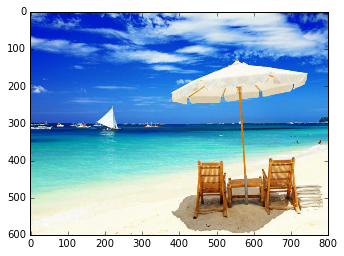

In [3]:
plt.imshow(beach_img)

# Having Some Fun

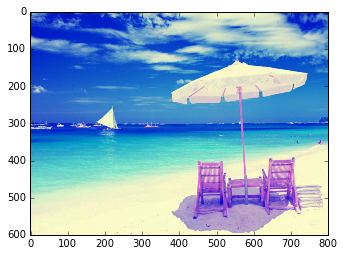

In [4]:
lum_img = beach_img
#print lum_img[0,0] 
my_img = np.zeros((200,100))
for space in lum_img:
    for pixel in space:
        pixel[2] = 200
plt.imshow(lum_img)

# Change Image to Grey Scale

The formula to change to grey scale is

$V = 0.2989 * R + 0.5870 * G + 0.1140 * B$

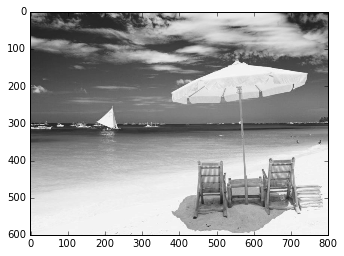

In [12]:
nbeach = beach_img.shape
beach_gimg = np.zeros(shape=(600,800), dtype='uint8')
for r in range(nbeach[0]):
    for c in range(nbeach[1]):
        R,G,B = beach_img[r][c]
        beach_gimg[r][c] = int(0.2989*R + 0.5870 * G + 0.1140 * B)
        
def show_grey(img):
    plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)

show_grey(beach_gimg)
        

# Creating the Inverse of the Image
minus 255 on EACH pixel

[[115 110 108]
 [107 104 102]
 [ 98  97  98]]


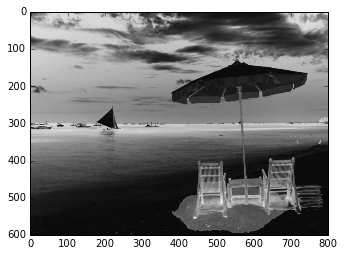

In [14]:
print beach_gimg[100:103, 100:103]
ng_gimg = 255 - beach_gimg
show_grey(ng_gimg)

# Doing Guassian Blur
- Create a mask on top of the image in a particular location
- Move this mask across the image at every location
- Compute the average value of the mask and change the center of the mask to the new compute average value
- Guassian is "normally distributed" NOT uniformly distributed
- Guassian mask is usually circular but the image is not circular so approximate a circle not a circle

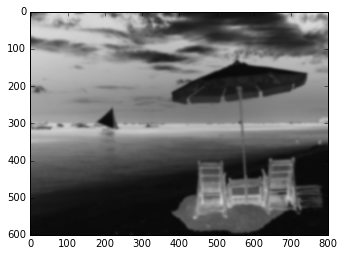

In [7]:
#we use scipy 
b_gimg = ndimage.gaussian_filter(ng_gimg, sigma=3)
show_grey(b_gimg)

# We are going to dodge blur 

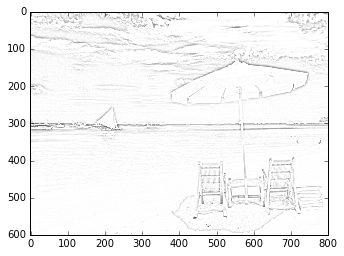

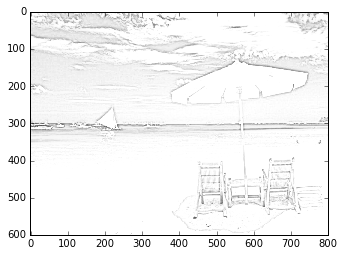

In [8]:
def dodge(image, mask):
    return np.clip(image*256/(255-mask), 0, 255)

dodge_img = dodge(beach_gimg, b_gimg)
show_grey(dodge_img)
final_img = 0.9 * dodge_img + 0.2 * beach_gimg
plt.figure()
show_grey(final_img)

# We can also do box filter
- we each location we draw a box n by n
- compute the average value inside the box
- replace the box with the average value

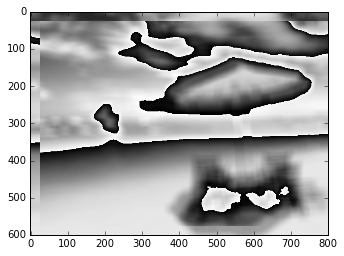

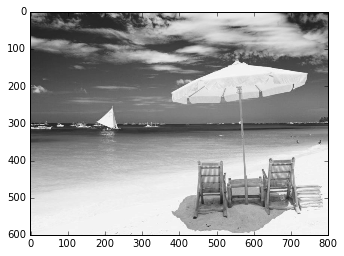

In [31]:
def box_filter(image, mask_size):
    new_image = np.zeros(image.shape, dtype='uint8')
    h = image.shape[0]
    w = image.shape[1]
    box_right = 0
    box_left = 0
    for r in range(h):
        for c in range(w):
            if r+mask_size/2 <= h and c+mask_size/2 <= w:
                box_right = image[r:r+mask_size/2, c:c+mask_size/2]
            if r-mask_size/2 > 0 and c-mask_size/2 > 0:
                box_left = image[r-mask_size/2:r, c-mask_size/2:c]
            new_image[r][c] = np.mean(box_right) + np.mean(box_left)
    return new_image

#print box_fill_img
box_fill_img = box_filter(beach_gimg, 50)
show_grey(box_fill_img)
plt.figure()
show_grey(beach_gimg)